<a href="https://colab.research.google.com/github/sandrojrs/Transfer-Learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Carregar o modelo MobileNetV2 sem a última camada (top=False)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas do modelo base
base_model.trainable = False

In [ ]:
# Adicionar novas camadas no topo da base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Adicionar um pooling global
    layers.Dense(128, activation='relu'),  # Camada oculta com 128 neurônios
    layers.Dense(3, activation='softmax')  # Camada de saída com 10 classes (modifique conforme necessário)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/treinamento/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 330 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=3,
    steps_per_epoch=50  # Ajuste de acordo com o tamanho do seu dataset
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 273ms/step - accuracy: 0.7398 - loss: 0.5613
Epoch 2/3


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - accuracy: 0.9560 - loss: 0.1106
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.9699 - loss: 0.0963


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/teste',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Teste Acurácia: {test_acc}")

Found 37 images belonging to 3 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 1.0000 - loss: 0.0281
Teste Acurácia: 1.0


Saving 20221208_180533.jpg to 20221208_180533.jpg


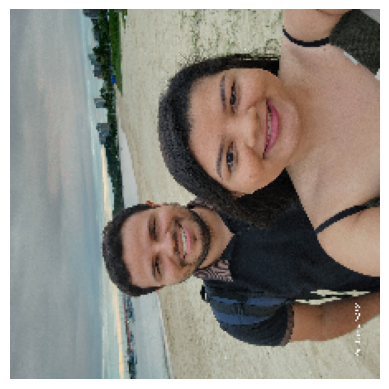

In [ ]:
uploaded = files.upload()

# Mostrar a imagem
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224))  # Carregar a imagem e redimensionar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Converter a imagem em array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar uma dimensão para batch
    img_array /= 255.0  # Normalizar a imagem

In [ ]:
# Fazer a predição
prediction = model.predict(img_array)

print(prediction[0])

# Obter o índice da classe com maior probabilidade
predicted_class = np.argmax(prediction[0])

# Converter o resultado da predição
if predicted_class == 0:
    print(f"Predição: Classe 0 ({prediction[0][0]})")
elif predicted_class == 1:
    print(f"Predição: Classe gato ({prediction[0][1]})")
elif predicted_class == 2:
    print(f"Predição: Classe cachorro ({prediction[0][2]})")
# ... adicione mais elif para outras classes, se necessário

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[3.00072456e-09 1.07617624e-01 8.92382324e-01]
Predição: Classe cachorro (0.8923823237419128)
